In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv('../Machine-Learning/Datasets/breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

#### Since, we don't have train_test_split we manually shuffle it.

# k-NN Model
#### 1. For a prediction set, we calculate it's eculidean distance from all points in the training set.
#### 2. Save that [ *euclidean_distance, group_of_pt_in_Training_set*]  in a list.
#### 3. Sort the list in terms of distance and make a list of nearest group numbers (class) as *votes*.
#### 4. Calculate the most common class as the *vote_result*.
#### 5. For *confidence* we calculate frequency of most common class / k

In [3]:
def KNN(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('The number of groups in the data is more than the K')
    distance = []
    for group in data:
        for features in data[group]:
            eculidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distance.append([eculidean_distance, group])
    votes = [i[1] for i in sorted(distance)[:k]]
    # Counter(votes).most_common(1) - returns a list of tuple of (most_commmon, frequency)
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence
        

# Data Prepration

In [4]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [5]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])


# Prediction and Testing
#### 1. For all the prediction_sets in both the classes in the testing_set we'll run a loop.
#### 2. If the most frequent class is same as the class of the prediction_set then our prediction is correct else wrong.
#### 3. Else if it's wrong we'll calculate it's confidence (number_of_most_frequent_class / k )
#### 4. Accuracy = correct / total

In [6]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote, confidence = KNN(train_set, data, k=5)
        if vote == group:
            correct += 1
        else:
            print(confidence)
        total += 1
print(correct/total)

0.8
1.0
0.9856115107913669


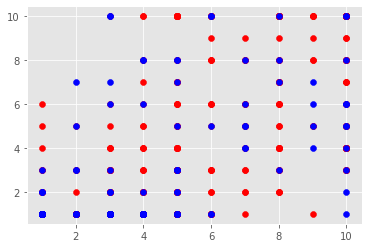

In [11]:
[[plt.scatter(i[0], i[1], color = 'red') for i in train_set[groups]] for groups in train_set]
[[plt.scatter(i[0], i[1], color = 'blue') for i in test_set[groups]] for groups in test_set]
plt.show()